In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [32]:
data=pd.read_csv("/content/drive/MyDrive/data/climate_change.csv")

In [34]:
data.head()
data_test = data[data['Year']>2006]
data = data[data['Year']<=2006]

In [35]:
data.drop(['Year','Month'],inplace=True,axis=1)
data_test.drop(['Year','Month'],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 283
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEI       284 non-null    float64
 1   CO2       284 non-null    float64
 2   CH4       284 non-null    float64
 3   N2O       284 non-null    float64
 4   CFC-11    284 non-null    float64
 5   CFC-12    284 non-null    float64
 6   TSI       284 non-null    float64
 7   Aerosols  284 non-null    float64
 8   Temp      284 non-null    float64
dtypes: float64(9)
memory usage: 22.2 KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Correlation Matrix

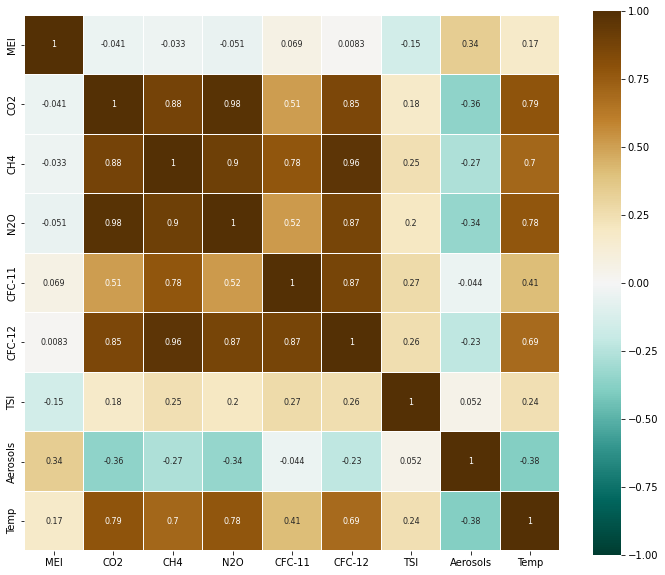

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), 
            cmap="BrBG_r", vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

## Initial Linear Regression

Coefficients:  [ 6.42053134e-02  6.45735927e-03  1.24041896e-04 -1.65280033e-02
 -6.63048889e-03  3.80810324e-03  9.31410835e-02 -1.53761324e+00]
Variance score: 0.7508932770523429
Mean Squared error:  0.009097810529180444


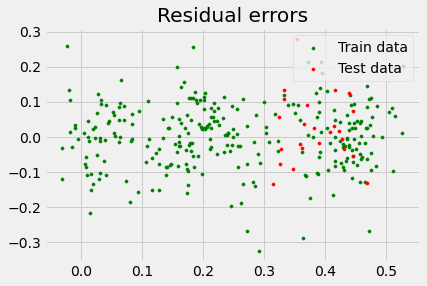

In [41]:
# splitting X and y into training and testing sets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27,
                                                    #random_state=1)
X_train = pd.DataFrame(data, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_train=data['Temp']
X_test = pd.DataFrame(data_test, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_test=data_test['Temp']
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_train, y_train)))
y_pred = reg.predict(X_test)
errors = mean_squared_error(y_test,y_pred)
print("Mean Squared error: ",errors)

# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green",s=10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "red", s = 10, label = 'Test data')
  
## plotting line for zero residual error
# plt.hlines(y = 0, xmin = 0, xmax = , linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

#### The R-Squared value of the model is 0.75 (Variance Score)

### Getting Coefficients and pValues

In [44]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant


x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results

pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,5)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-124.594260,0.00000
MEI,0.064205,0.00000
CO2,0.006457,0.00505
CH4,0.000124,0.81015
N2O,-0.016528,0.05467
CFC-11,-0.006630,0.00006
CFC-12,0.003808,0.00021
TSI,0.093141,0.00000
Aerosols,-1.537613,0.00000


From above table we can say that CH4 and N2O has p values grater than 5%. So we can concluded this as insignificant attributes for the sample
<br>
So Significant values will be <b> MEI, CO2, CFC.11, CFC.12, TSI, Aerosols</b>

## Final Model creation

Coefficients:  [ 0.06421403  0.00406093 -0.00431413  0.00242963  0.08851984 -1.56650894]
Variance score: 0.7474670639113057
Mean Squared error:  0.010383577897088913


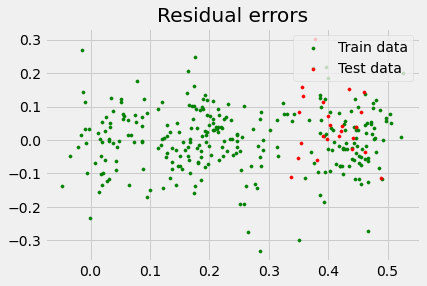

In [45]:
X_train = pd.DataFrame(data, columns=['MEI','CO2', 'CFC-11','CFC-12','TSI','Aerosols'])
y_train=data['Temp']
X_test = pd.DataFrame(data_test, columns=['MEI','CO2', 'CFC-11','CFC-12','TSI','Aerosols'])
y_test=data_test['Temp']
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_train, y_train)))
y_pred = reg.predict(X_test)
errors = mean_squared_error(y_test,y_pred)
print("Mean Squared error: ",errors)

# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green",s=10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "red", s = 10, label = 'Test data')
  
## plotting line for zero residual error
# plt.hlines(y = 0, xmin = 0, xmax = , linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

The R Sqaured alue decreased to 0.74

### Getting new Coeffients and P-values

In [46]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant


x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results

# results.params
# results.pvalues

pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,5)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-122.252662,0.00000
MEI,0.064214,0.00000
CO2,0.004061,0.03611
CFC-11,-0.004314,0.00013
CFC-12,0.002430,0.00019
TSI,0.088520,0.00000
Aerosols,-1.566509,0.00000


## Problem 2.1
Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that 
are able to trap heat from the sun and contribute to the heating of the Earth. However, the 
regression coefficients of both the N2O and CFC-11 variables are negative, indicating that 
increasing atmospheric concentrations of either of these two compounds is associated with 
lower global temperatures.<br>
Which of the following is the simplest correct explanation for this contradiction?<br>
1. Climate scientists are wrong that N2O and CFC-11 are greenhouse gases - this 
regression analysis constitutes part of a disproof.
2. There is not enough data, so the regression coefficients being estimated are not 
accurate.
3. All of the gas concentration variables reflect human development - N2O and CFC.11 are 
correlated with other variables in the data set.

#### Ans
1. The first statement can be reject since the effects of N2O and CFC.11 are research upon by the scientist on large dataset and is well documented.
2. Second Expalnation might be wrong as we had good amount of data to train and also got the high accuracy on unseen data
3. The linear correlation of N2O and CFC.11 with other variables in the data set is quite large.